<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_edu_intro_DL_NLP/blob/week_3/IntroToDL_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy

## Что это такое?

Что такое Numpy? Это библиотека, которая позволяет достаточно быстро выполнять различные операции с массивами (многомерными и не очень): перемножение, сложение, преобразования, базовый анализ данных

Вся работа в массивами в Numpy гораздо проще и быстрее, чем с обычными списками в Python. Давайте проверим это на простом примере

Достаточно часто в линале вам надо было перемножать матрицы, при этом внутри Python нет встроенного перемножения матриц. Давайте попробуем перемножить две матрицы в чистом Python и с помощью numpy и сравним время

In [1]:
a = [[i for i in range(50)] for j in range(50)] #возьмем матрицу a размера 50x50
b = [[i for i in range(100)] for j in range(50)] #возьмем матрицу b размера 50x100

In [2]:
## Pure Python
def matmul_python(a,b):
    return [[sum(ele_a * ele_b for ele_a, ele_b in zip(row_a, col_b))
             for col_b in list(zip(*b))] for row_a in a]

In [4]:
import numpy as np

# NumPy (сделаем функцию, чтобы было честнее)
def matmul_numpy(a, b):
    return np.matrix(a) * np.matrix(b)

In [5]:
%%time

k_python = matmul_python(a, b)

CPU times: user 36.2 ms, sys: 0 ns, total: 36.2 ms
Wall time: 46 ms


In [6]:
%%time

k_numpy = matmul_numpy(a, b)

CPU times: user 1.02 ms, sys: 943 µs, total: 1.96 ms
Wall time: 1.57 ms


In [ ]:
# проверяем, что таблицы совпадают
np.alltrue(k_python == k_numpy)

True

Удивительно, Numpy почти в 30 раз быстрее, чем Python! За счет чего это получается?

Причин несколько:

* В первую очередь за счет ограничения со стороны размера: если в Numpy при создании объекта он имеет фиксированный размер (и если его надо поменять, то создастся новый объект и старый будет удален), то в Python нет фиксированного размера (что усложняет работу)

* За счет фиксированного размера массивы в NumPy и хранятся в памяти по-другому:

Numpy хранит данные друг за другом:

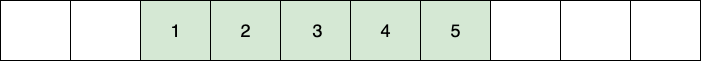

В свою очередь внутри Python элементы хранятся рандомно (поэтому когда вы обращаетесь к элементу, то вы обращаетесь к ссылке, ссылка идет в нужное место в памяти и находит его). С точки зрения выполнения арифметических операций это сложнее

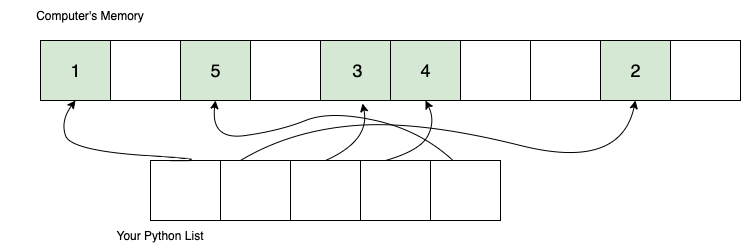

* А такое хранение позволяет гораздо проще итерироваться по массиву (итерация идет с помощью strides, говорящая, по сути, сколько бит надо пройти до следующего значения в строке/столбце)

Рассмотрим ситуацию с транспонированием: это же в Python надо брать и прямо переворачивать! А вот в Numpy мы по сути не меняем хранение данных, мы просто делаем другие strides!

Попробуйте запустить:

```
b = np.matrix(b)
print(b.strides)
print(b.T.strides)
```

И вы увидите, что поменялись strides (что говорит о том, что данные остались на местах, мы просто изменили то, как по нему ходить)

* Код в Numpy - это прекомпилированный код, написанный на C (то есть мы проходим более быстрый путь от компиляции до выполнения)

В целом этого уже достаточно, чтобы использовать Numpy (а теперь представьте, если делать все преобразования с массивами в моделях ML делать с помощью чистого Python, было бы безумие)

In [7]:
b = np.matrix(b) # b - матрица 100 на 50

print(b.strides) # один элемент занимает 8 байт, поэтому чтобы перейти к новой строке, нам надо пройти 100*8 байт, а к новому столбцу - 8 байт
print(b.T.strides)

(800, 8)
(8, 800)


## Как пользоваться?

А теперь о том, как пользоваться и что надо знать (будем учить матчасть)

Самое полезное - [документация](https://numpy.org/doc/stable/reference/index.html) (к ней в любом случае надо будет обращаться, знать все невозможно)

#### Создание



Массивы в Numpy называются ndarray (n-dimensional array). Массив можно создать из любого массива в Python, можно также создать из коробки

Обратите внимание: чтобы создать нормально ndarray из питоновских списков, нужно иметь в виду:

* Все элементы должны быть одного типа данных (иначе вы можете создать массив, состоящий из питоновских листов, будет грустно, никакого эффекта), не полагайтесь на ум numpy

* Если у вас все ок, но при этом есть одни элемента float, другие int, то он может не привести самостоятельно все в формат float. Так что будет славно, если вы укажете тип элементов в ndarray

In [8]:
a = [1, 2, 2.7]

print(np.array(a))
print('-' * 30)
print(np.array(a, int)) # второй аргумент - тип. Если указать, то он попробует перевести все элементы в этот типа
print('-' * 30)
print(np.array(a, str)) # со строками тоже работает

a = [[1, 2, 'str'], [1, 2 ,3]]

print('-' * 30)
np.array(a) # он приведет, но хотели ли вы этого?..

[1.  2.  2.7]
------------------------------
[1 2 2]
------------------------------
['1' '2' '2.7']
------------------------------


array([['1', '2', 'str'],
       ['1', '2', '3']], dtype='<U21')

Из коробки можно создать много разных массивов, например:

* np.zeros - создать массив из нулей (аргументы - tuple размеров, опционально - тип)

In [9]:
np.zeros((3, 4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

* np.ones - создать массив из единиц (аргументы - tuple размеров, опционально - тип)

In [10]:
np.ones((3, 4), dtype=float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

* np.eye - создать массив из нулей и единиц на главной диагонали (аргументы - размеры матрицы, опционально - тип)

* np.identity(n) - создать единичную матрицу размера $n \times n$

In [11]:
np.eye(4, 3, dtype=str)

array([['1', '', ''],
       ['', '1', ''],
       ['', '', '1'],
       ['', '', '']], dtype='<U1')

* np.empty - создать массив из рандомных элементов

In [12]:
np.empty((2, 3), float)

array([[4.94816063e-310, 0.00000000e+000, 3.68067497e+180],
       [2.46345036e-154, 2.65141253e+180, 3.99461109e+252]])

Функции для созданий одномерных массивов:

* np.arange(a, b, step) - аналог range (получаем массив)

* np.linspace(a, b, num, enndpoint=True) - получить равномерно $num$ значений от $a$ (включительно) до $b$ (до endpoint - включительно или нет)

* np.logspace(a, b, num, endpoint=True, base=10.0) - получить равномерные значения по логарифмической шкале (от $base^a$ до $base^b$)

In [13]:
print(np.arange(0, 10))
print(np.linspace(0, 10, 11, endpoint=True))
print(np.logspace(2, 4, 5, endpoint=True, base=2))

[0 1 2 3 4 5 6 7 8 9]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 4.          5.65685425  8.         11.3137085  16.        ]


Теперь про другие способы создать ndarray. Очевидно, что вам часто потребуется загрузить из каких-то других источников (например, вам дали файл и сказали: делай)

Варианты:

* np.loadtxt(file, delimeter, skiprows=0) - возьми данные из текста, разделяются через delimiter (например, \t - табами), скипни skiprows строк (если там вам не нужны названия, например)

* np.fromstring(s, sep) - загрузи из строки

* np.load(file) - загрузи из файла (работает для всяких штук типа .npy, .npz)

#### Индексация

Тут все достаточно просто - обращение как в питоновских списках

In [16]:
a = np.arange(28)
a = a.reshape(2, -1)
print(a)


print(a[0][0], a[0, 0]) # обращение к элементу, несколько вариантов
print(a[:1]) # вывести строку
print(a[-1][5:7]) # вывести последнюю строку и часть столбцов
print(a[:, 5:7]) # вывести столбцы

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20 21 22 23 24 25 26 27]]
0 0
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]]
[19 20]
[[ 5  6]
 [19 20]]


#### Арифметика

Ну почти как везде (операции с числами считаются как операции со скаляром):

* +, - - сложение-вычитание (поэлементно)

* \* - умножение (поэлементное)

* .T - транспонирование

* A.dot(B) - перемножение матриц

In [17]:
np.random.seed = 1514 ##зададим какой-нибудь seed

a = np.empty((3, 3))
b = np.empty((3, 3))

print(a)
print(b)
print(a + b)
print(a - b)
print(a * b)
print(a.dot(b))

[[4.94816087e-310 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
[[4.9481609e-310 0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000 0.0000000e+000]]
[[9.89632177e-310 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]
[[-2.26471e-318  0.00000e+000  0.00000e+000]
 [ 0.00000e+000  0.00000e+000  0.00000e+000]
 [ 0.00000e+000  0.00000e+000  0.00000e+000]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Умножений, на самом деле, есть несколько:

* a * b - поэлементный (обратите внимание, если a и b типа matrix, то это просто умножение)

* a.dot(b) и np.dot(a, b) - умножение матриц (a на b)

* np.matmul(a, b) и a @ b - умножение матриц, но тут сложнее :)


Функции numpy.dot и numpy.matmul (также известная как @ в Python 3.5 и выше) выполняют матричное умножение (матричное произведение), но имеют разные правила работы в зависимости от типов и форм массивов. Вот их основное отличие:

* **numpy.dot:**
Функция numpy.dot выполняет умножение двух массивов, независимо от их типов и размерностей.
Если оба массива являются одномерными (векторами), то numpy.dot выполняет скалярное произведение (dot product) векторов.
Если хотя бы один из массивов является двумерным или имеет более высокую размерность, то numpy.dot выполняет матричное умножение (matrix multiplication) в соответствии с общими правилами линейной алгебры.

* **numpy.matmul:**
Функция numpy.matmul (или оператор @) предназначена специально для выполнения матричного умножения.
Она следует строгим правилам матричного умножения и может быть использована только для массивов с совместимыми размерностями. Это означает, что для умножения массивов с помощью numpy.matmul, число столбцов первой матрицы должно совпадать с числом строк второй матрицы.
Если вы попытаетесь выполнить матричное умножение с массивами, которые не совместимы по размерности, numpy.matmul выдаст ошибку.

In [ ]:
a = np.arange(2 * 3).reshape((2, 3))
b = np.arange(3 * 2).reshape((2, 3))

np.matmul(a,b).shape

ValueError: ignored

#### Размерности

Теперь давайте поговорим про размерности, потому что с этим вы будете сталкиваться чаще всего (но чаще это будет в pandas)

Базово:

* shape - посмотреть размерности

* reshape - привести к новым размерностям (работает как transpose - меняем strides)

* ravel/flatten - приведи к одномерному массиву

* newaxis - добавь размерность

А теперь в деталях:

In [18]:
a = np.arange(28)
print(a.shape) # размерность 28, логично
print(a.reshape(2, -1).shape) # приведи к размеру 2 x 14 (-1 значит все остальное)

(28,)
(2, 14)


In [19]:
# если новая размерность не влезает (то есть у вас 28 элементов, а вы хотите размер (3, 2, 5)), то выдаст ошибку
print(a.reshape(3, 2, 5))

ValueError: ignored

In [20]:
a = a.reshape(2, -1) # сама по себе не меняет размерность
print(a.flatten())
print(a.ravel())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


Получаем одно и то же, но функции разные, в чем прикол?

* flatten возвращает копию (то есть она независима от исходного массива)

* ravel создает только view (то есть ссылку на origin), и если поменять в исходном массиве значение, то и в ravel оно изменится (имейте это ввиду)

In [21]:
a_f = a.flatten()
a_r = a.ravel()
a[0][0] = 1
print(a_r) # изменилось, ух ты!

[ 1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


А теперь допустим, что нам нужно не уменьшить число размерностей, а наоборот, их добавить

Это можно сделать с помощью newaxis!

In [29]:
a = np.arange(28)
a = a.reshape(2, -1)
print(a.shape)
print(a)
a_new = a[:, np.newaxis, :] # указываем newaxis туда, куда нам нужно, : значит возьми все
print(a_new.shape)
print(a_new)
a = a.reshape(2, 1, -1) # можно и сделать с помощью reshape
print(a.shape)
print(a)

(2, 14)
[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20 21 22 23 24 25 26 27]]
(2, 1, 14)
[[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]]

 [[14 15 16 17 18 19 20 21 22 23 24 25 26 27]]]
(2, 1, 14)
[[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]]

 [[14 15 16 17 18 19 20 21 22 23 24 25 26 27]]]


#### Соединения и добавления

Представим новую ситуацию: у вас есть два набора данных (допустим, за прошлую неделю и за текущую) и вы хотите их соединить их в единый набор данных

Или же у вас одна половина данных лежит в одной, а другая в другой (скажем, есть карточка товара, в одном месте лежит вся информация про id, название etc, а в другом всякие web-счетчики: сколько посмотрели-покликали и так далее)

Тогда на помощь приходят:

* np.concatenate((arr1, arr2), axis) - соедини две таблицы по выбранному axis (по дефолту 0)

* np.vstack((arr1, arr2)) - соедини две таблицы строчно (то есть друг под другом).То же самое, что и np.concatenate((arr1, arr2), axis=0)

* np.hstack((arr1, arr2)) - соедини две таблицы по колонке (то есть arr1-arr2).То же самое, что и np.concatenate((arr1, arr2), axis=1)

**Как и в перемножении матриц, размерности должны сходиться!**

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(np.vstack((a, b)))
print(np.hstack((a, b)))
print(np.concatenate((a, b), axis=0))
print(np.concatenate((a, b), axis=1))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]
[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[1 2 5 6]
 [3 4 7 8]]


А если хотим добавить?

* np.append(arr_1, arr_2, ..., arr_n, axis) - сделай append (если отдельно задаете axis, то размерности должны быть одинаковыми)

* np.insert(arr, slice, value, axis) - добавь в arr в slice значение value по выбранному axis

* np.resize(arr, (sizes)) - по сути reshape, но если получившийся итог получается больше, то заполняет остальное копией a (аккуратнее с этим, лучше не делать с матрицами)

* arr.resize((sizes)) - reshape, если больше, то заполнит нулями (аккуратно с этим)

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print(np.append(a, b))
print('-' * 30)
print(np.insert(a, 1, b, axis = 0))
print('-' * 30)
print(np.resize(a, (5, 2))) # похож на reshape
print('-' * 30)
a.resize((1, 10), refcheck=False) # refcheck - не проверяй на наличие ссылок (иначе упадет)
print(a)
print('-' * 30)
a = np.array([[1, 2], [3, 4]])
print(np.append(a, [1, 2]))

[1 2 3 4 5 6 7 8]
------------------------------
[[1 2]
 [5 6]
 [7 8]
 [3 4]]
------------------------------
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]]
------------------------------
[[1 2 3 4 0 0 0 0 0 0]]
------------------------------
[1 2 3 4 1 2]


#### Сравнения

Все, помучили наш массив как только можем, давайте теперь его как-то исследовать

Допустим, теперь хотим что-то отфильтровать или посмотреть какие-то конкретные значения

In [ ]:
a = np.arange(30)
print(a[(a > 15) & (a < 27) | (a < 9)]) # как добавить несколько условий сразу через & и | (и/или)
cond = (a > 15) & (a < 27) | (a < 9) # условия можно отдельно записывать, даст массив True-False
print('-' * 30)
print(a[cond])
print(cond)

[ 0  1  2  3  4  5  6  7  8 16 17 18 19 20 21 22 23 24 25 26]
------------------------------
[ 0  1  2  3  4  5  6  7  8 16 17 18 19 20 21 22 23 24 25 26]
[ True  True  True  True  True  True  True  True  True False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True False False False]


In [ ]:
a = np.arange(30).reshape(5, -1)
b = (np.arange(30) - 1).reshape(5, -1)
b[0][0] = 15
a > b # для таких сравнений должны быть одинаковые размерности

In [ ]:
print((a > b).all()) # проверить, все ли значения True
print((a > b).any()) # првоерить, есть ли хотя бы одно True
print(a[a > b]) # выведет одномерный массив
print('-' * 30)
print(a[a[:, 0] > [1, 1, 1, 1, 1]]) # можно сравнивать и вот так

Теперь хотим применить условие и что-то сделать со значениями (обрезать или поменять)

Можно по старинке:

In [ ]:
a = np.arange(30).reshape(5, -1)
a[a > 0] = a[a > 0] * 5
a

array([[  0,   5,  10,  15,  20,  25],
       [ 30,  35,  40,  45,  50,  55],
       [ 60,  65,  70,  75,  80,  85],
       [ 90,  95, 100, 105, 110, 115],
       [120, 125, 130, 135, 140, 145]])

Но можно и лучше!

* np.where(cond, act_1, act_2) - измени значения в зависимости от условия (если True, то сделай одно, если False, то другое)

* np.clip(arr, a_min, a_max) - ограничить значения (все, что меньше a_min, станет a_min, все, что больше a_max, станет a_max)

Последнее нужно, например, для обработки картинок (допустим, вам пришли плохие данные, где есть значения не в пределах от 0 до 256)

In [ ]:
a = np.arange(30).reshape(5, -1)
a = np.where(a > 0, a * 5, a)
print(a)
print('-' * 30)
a = np.clip(a, 10, 100)
print(a)

[[  0   5  10  15  20  25]
 [ 30  35  40  45  50  55]
 [ 60  65  70  75  80  85]
 [ 90  95 100 105 110 115]
 [120 125 130 135 140 145]]
------------------------------
[[ 10  10  10  15  20  25]
 [ 30  35  40  45  50  55]
 [ 60  65  70  75  80  85]
 [ 90  95 100 100 100 100]
 [100 100 100 100 100 100]]


#### Прочие полезные вещи

Все, теперь к полному анализу наших данных!

![](https://i.gifer.com/embedded/download/3nHQ.gif)

Что умеем?

*   sum, mean, std, min, max, prod - классика (сумма, среднее, стандратное отклонение, минимум/максимум, произведение)

*   argmin, argmax - найди индекс максимума/минимума (знаете же, что в Python так нельзя, а вот тут пожалуйста)

* nonzero - вывести индексы ненулевых значений

* sort, unique - сортировка, уникальные элементы

* diag, trace - вывести диагональ, след матрицы (работает только для размерности < 3)

* cumsum, cumprod - кумулятивы сумм-произведений

* isnan, isinf, isposinf, isneginf - поиск "плохих" значений

* nan_to_num(x, nan, posinf) - если где-то видим nan или inf, то можем его поменять на значение в nan или posinf



In [ ]:
a = np.array([[[1, 2, 3], [4, 5 ,6], [7, 8, 9]], [[-np.inf, 2, 3], [4, np.nan ,6], [np.nan, 8, np.inf]]])
print(np.argwhere(np.isnan(a)))
print('-' * 30)
print(np.argwhere(np.isinf(a)))
print('-' * 30)
print(np.argwhere(np.isposinf(a)))
print('-' * 30)
print(np.argwhere(np.isneginf(a)))
print('-' * 30)

[[1 1 1]
 [1 2 0]]
------------------------------
[[1 0 0]
 [1 2 2]]
------------------------------
[[1 2 2]]
------------------------------
[[1 0 0]]
------------------------------


In [ ]:
np.nan_to_num(a, copy=False, nan=0, posinf=999, neginf=-999)
# очень часто у функций есть аргумент copy, то есть создавать новую копию или менять в исходном массиве
print(a.sum()) # полная сумма
print('-' * 30)
print(a.sum(axis=0)) # сумма по оси
print('-' * 30)
print(a.std())

68.0
------------------------------
[[-998.    4.    6.]
 [   8.    5.   12.]
 [   7.   16. 1008.]]
------------------------------
333.01310544040416


In [ ]:
print(np.cumsum(a))
print('-' * 30)
print(np.cumprod(a)) #

[   1.    3.    6.   10.   15.   21.   28.   36.   45. -954. -952. -949.
 -945. -945. -939. -939. -931.   68.]
------------------------------
[ 1.00000000e+00  2.00000000e+00  6.00000000e+00  2.40000000e+01
  1.20000000e+02  7.20000000e+02  5.04000000e+03  4.03200000e+04
  3.62880000e+05 -3.62517120e+08 -7.25034240e+08 -2.17510272e+09
 -8.70041088e+09 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00]


#### Линейная алгебра (np.linalg)

Самый сильный инструмент внутри numpy - это модуль numpy.linalg, который позволяет применить кучу методов из линейной алгебры (например, сделать за вас тот же самый SVD)

Из основного:

* numpy.linalg.multi_dot - перемножение нескольких матриц сразу (причем выбирается самый быстрый способ перемножения)

* np.vdot - скалярное произведение (не нужно делать .T  
как минимум)

* numpy.linalg.matrix_power - возвести матрицу в нужную степень

* numpy.linalg.norm - матричная норма

* numpy.linalg.det - определитель матрицы

* numpy.linalg.inv - обратная матрица (если нет, то будет считать через pinv - псевдообратная матрица)

* numpy.linalg.solve(a, b) - решить систему $ax = b$

Разложения:

* choletsky, qr, SVD - разложение Холецкого, QR-декомпозиция, SVD-разложение (можно сделать усеченным)

* eig, eigvals - собственные вектор**Ы** и собственные значения


In [ ]:
import numpy.linalg as lin

A = np.matrix([[1, 2, 3], [4, 5, 11], [7, 8, 10]])
print("Определитель матрицы:", lin.det(A))
print('-' * 30)
print("Обратная матрица:", lin.inv(A))
print('-' * 30)
print("Третья степень матрицы:", lin.matrix_power(A, 3))
print('-' * 30)
b = np.array([1, 2, 3])
print("Решаем систему:", lin.solve(A, b))
print('-' * 30)
c = np.array([1, 2, 3])
print("Скалярное произведение:", np.vdot(c, b))
print('-' * 30)

Определитель матрицы: 27.0
------------------------------
Обратная матрица: [[-1.40740741  0.14814815  0.25925926]
 [ 1.37037037 -0.40740741  0.03703704]
 [-0.11111111  0.22222222 -0.11111111]]
------------------------------
Третья степень матрицы: [[ 559  680 1036]
 [1824 2223 3404]
 [2108 2560 3891]]
------------------------------
Решаем систему: [-0.33333333  0.66666667  0.        ]
------------------------------
Скалярное произведение: 14
------------------------------


In [ ]:
U, s, Vh = lin.svd(A)
print(U)
print('-' * 30)
print(s)
print('-' * 30)
print(Vh)

[[-0.18951531 -0.10237519 -0.97652612]
 [-0.6434869  -0.73824699  0.20227702]
 [-0.74162562  0.66671636  0.07403202]]
------------------------------
[19.51894064  2.78648927  0.496421  ]
------------------------------
[[-0.40754477 -0.48821656 -0.77172006]
 [ 0.5783806   0.51597023 -0.63186281]
 [ 0.70667046 -0.70386029  0.07209402]]


In [ ]:
lin.eig(A)

(array([18.83666805, -0.65787568, -2.17879237]),
 matrix([[-0.19655135, -0.61840136,  0.01695951],
         [-0.64434967,  0.7673012 , -0.84013156],
         [-0.73904064, -0.16978994,  0.54211746]]))

#### Несколько полезных вещей

* np.meshgrid(x_{i}, indexing) - вернуть координатную сетку из координат $x_i$

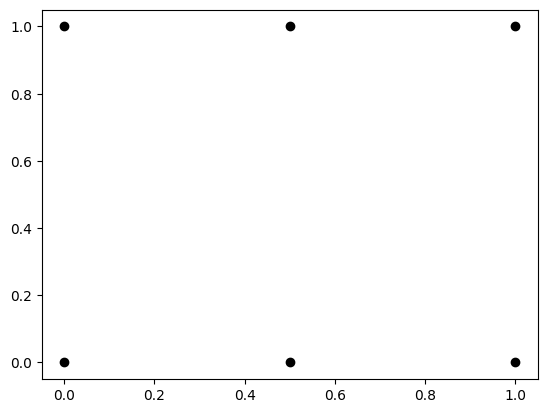

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)

plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [ ]:
print(xv, '\n', yv)

[[0.  0.5 1. ]
 [0.  0.5 1. ]] 
 [[0. 0. 0.]
 [1. 1. 1.]]


По существу - каждая точка имеет координаты, которые раскиданы в разных матрицах (по необходимой оси)

#### Конвенция Эйнштейна и ее сила (***)

Но самая сильная вещь внутри numpy - это поддержка конвенции Эйнштейна и ее наглядное исполнение с помощью функции einsum()

Что такое конвенция (или соглашение) Эйнштейна? Чаще всего оно используется в тензорах (тензор, если упрощать, это многомерный массив), которое облегчает форму записи.

Попробуем в самом начале на примере, на основе которых мы поймем, что это такое:

Дана матрица $A \in \mathbb{M}_{n x k}$ и $B \in \mathbb{M}_{k x m}$. Хотим перемножить и получить матрицу $C \in \mathbb{M}_{n x m}$

Давайте запишем формулу, которая должна получать элемент $c_{ij}$:

$$c_{ij} = \sum_{k} a_{ik} b_{kj} $$

Что здесь важно?

1. Здесь есть свободные и фиктивные индексы. Свободный индекс - это не фиктивный индекс. Фиктивный индекс - это индекс, который входит в формулу дважды (в данном случае $k$ - фиктивный, его можно заменить на что угодно и смысл не изменится)

2. Свободные индексы слева и справа одинаковые (и равны)

Что предполагает соглашение Эйнштейна? По фиктивным индексам всегда происходит сложение, поэтому знак сумму смысла особого не имеет, мы можем его опустить и получить следующее:

$$ c_{ij} = a_{ik} b_{kj} $$

То есть суммирование само по себе предполагается. На самом деле тут есть еще один момент (уже для читабельности): фиктивный индекс вначале идет снизу, а потом сверху:

$$c_{ij} = a_{ik}b^{k}_{j} $$

Теперь непосредственно с einsum(). Функция поддерживает нотацию соглашения Эйнштейна в следующем виде (опять давайте для примера возьмем перемножение двух матриц):

In [ ]:
m_1 = np.array([[1, 2], [3, 4], [5, 6]])
m_2 = np.array([[7, 8], [9, 10]])

np.einsum("ij,jk->ik", m_1, m_2)

array([[ 25,  28],
       [ 57,  64],
       [ 89, 100]])

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

result = np.einsum('i, i', x, y) # скалярное произведение

Как читать нотацию?

```
indies for arguments -> result indices
```

То есть мы перечисляем индексы для каждой матрицы из указанных в аргументе (с учетом свободных и фиктивных) и далее получаете результат!

Второй способ рассуждать: напишите for, который нам нужен, чтобы получить результат

In [ ]:
m_1 = np.array([[1, 2], [3, 4], [5, 6]])
m_2 = np.array([[7, 8], [9, 10]])

np.einsum("ij,jk->", m_1, m_2) #Выведет сумму всех элементов

Давайте попробуем сделать пару примеров:

1. Найти сумму всех элементов

2. Найти след матрицы

3. Перемножить матрицу на вектор

4. Поэлементное произведение

In [ ]:
print(np.einsum("ij -> ", m_1))
print(np.einsum("ii -> ", m_2))
v = np.array([[0, 1]])
print(np.einsum("ij,kj->ik", m_1, v))
print(np.einsum("ij,ij->ij", m_1, m_1))

#### Выгрузка

Ну все, потрудились, можно и результаты сохранить:

* np.save(name, arr) -  сохранить файл с раширением .npy

* np.savetxt(file, arr) - сохранить файл в txt

## Упражнения

[Задачи для самостоятельной работы](https://colab.research.google.com/drive/17zzCB0bjyLVzn3Pr3zmJ-FLJEmufMJzM)